##PROJECT TASK 2
##**SMS SPAM DETECTION WITH MACHINE LEARNING**

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("/content/spam.csv", encoding="ISO-8859-1")
df.shape

(5572, 5)

In [3]:
df['spam'] = df['v1'].apply(lambda x: 0 if x == "ham" else 1)

In [4]:
df = df.drop(['v1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
df.head()

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### From the above information this is out Dataset Description:

* Variable	Description
* v2	Text SMS.
* spam	target, its labeling that sms is spam or not.

In [6]:
df.isnull().sum()

v2      0
spam    0
dtype: int64

In [7]:
df.describe(include=object).T

,count,unique,top,freq
v2,5572,5169,"Sorry, I'll call later",30


In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(keep='first',inplace=True)

## Visualization

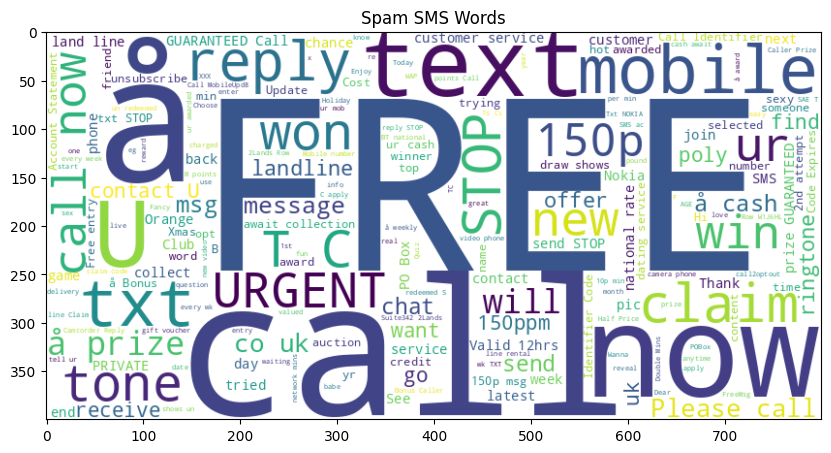

In [10]:
spam_df = df[df['spam'] == 1]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Spam SMS Words')
plt.show()

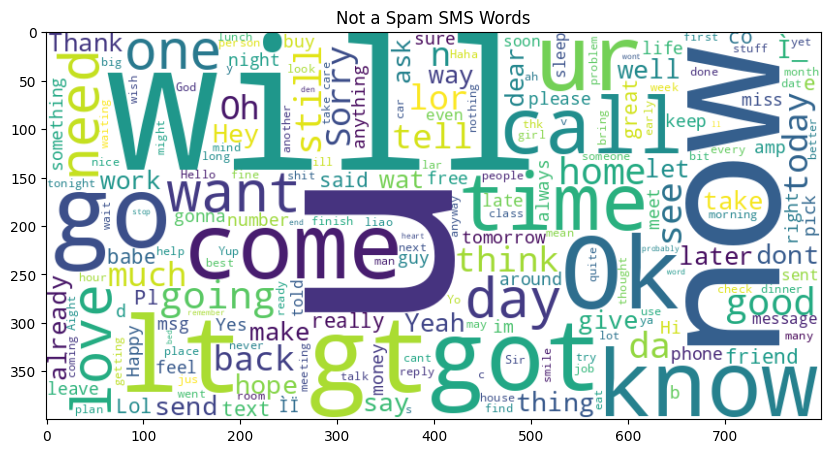

In [11]:
spam_df = df[df['spam'] == 0]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Not a Spam SMS Words')
plt.show()

In [12]:
X , y = df['v2'] ,df['spam']

## Data split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [15]:
print(len(X_train))
print(len(X_test))

4135
1034


## Feature Extraction

In [16]:
vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

## Spam Detection
I will be using the following models:

* LinearSVC
* Random Forest Classifier
* XGBClassifier

## Linear Support Vector Classifier (LinearSVC)

In [17]:
clf = LinearSVC()
clf.fit(X_train_vertorized,y_train)

LinearSVC()

In [18]:
y_pred = clf.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.9825918762088974

confusion matrix: 
[[887   2]
 [ 16 129]]

precision score:  0.9847328244274809


In [19]:
data_frame = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
data_frame

,actual,predicted
1617,0,0
2064,0,0
1272,0,0
3020,0,0
3642,0,0
...,...,...
4146,0,0
1208,0,0
4795,1,1
3575,0,0


Text(0.5, 1.0, 'Model Performance')

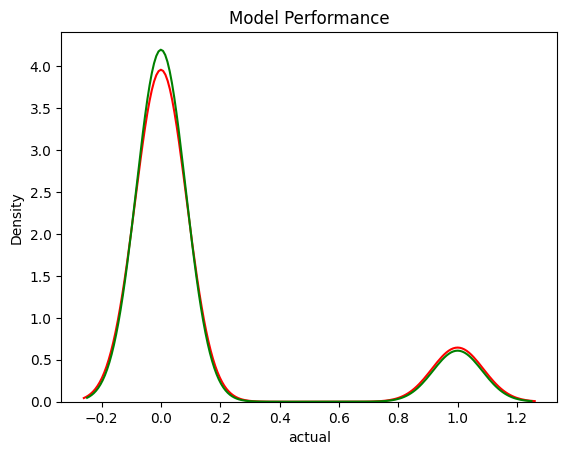

In [20]:
ax = sns.kdeplot(data_frame['actual'], color='r', label='Actual Price')
sns.kdeplot(data_frame['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

The Red shows the distribution count for actual values and the Green line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

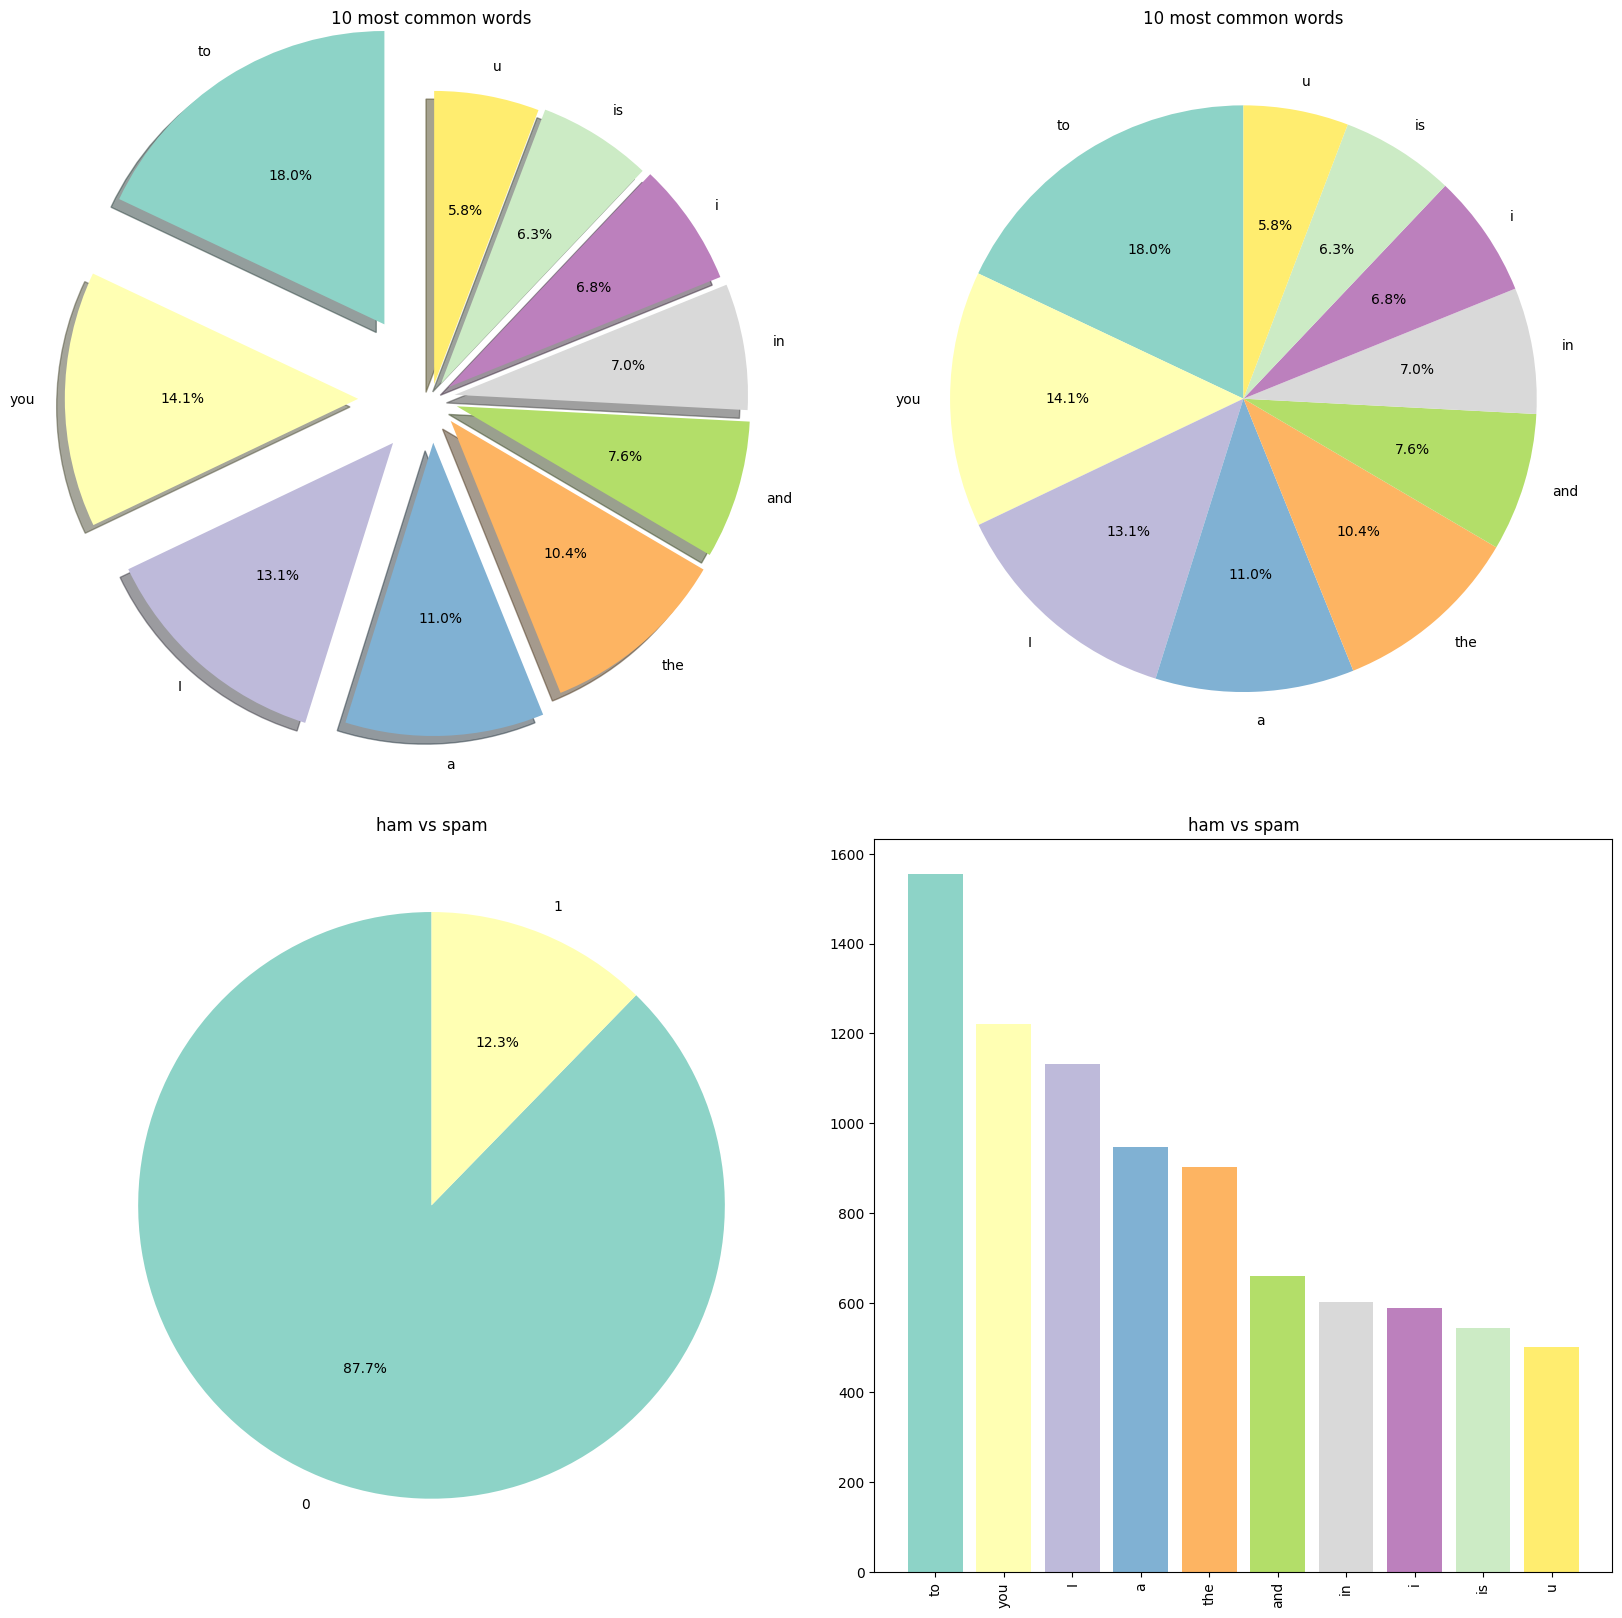

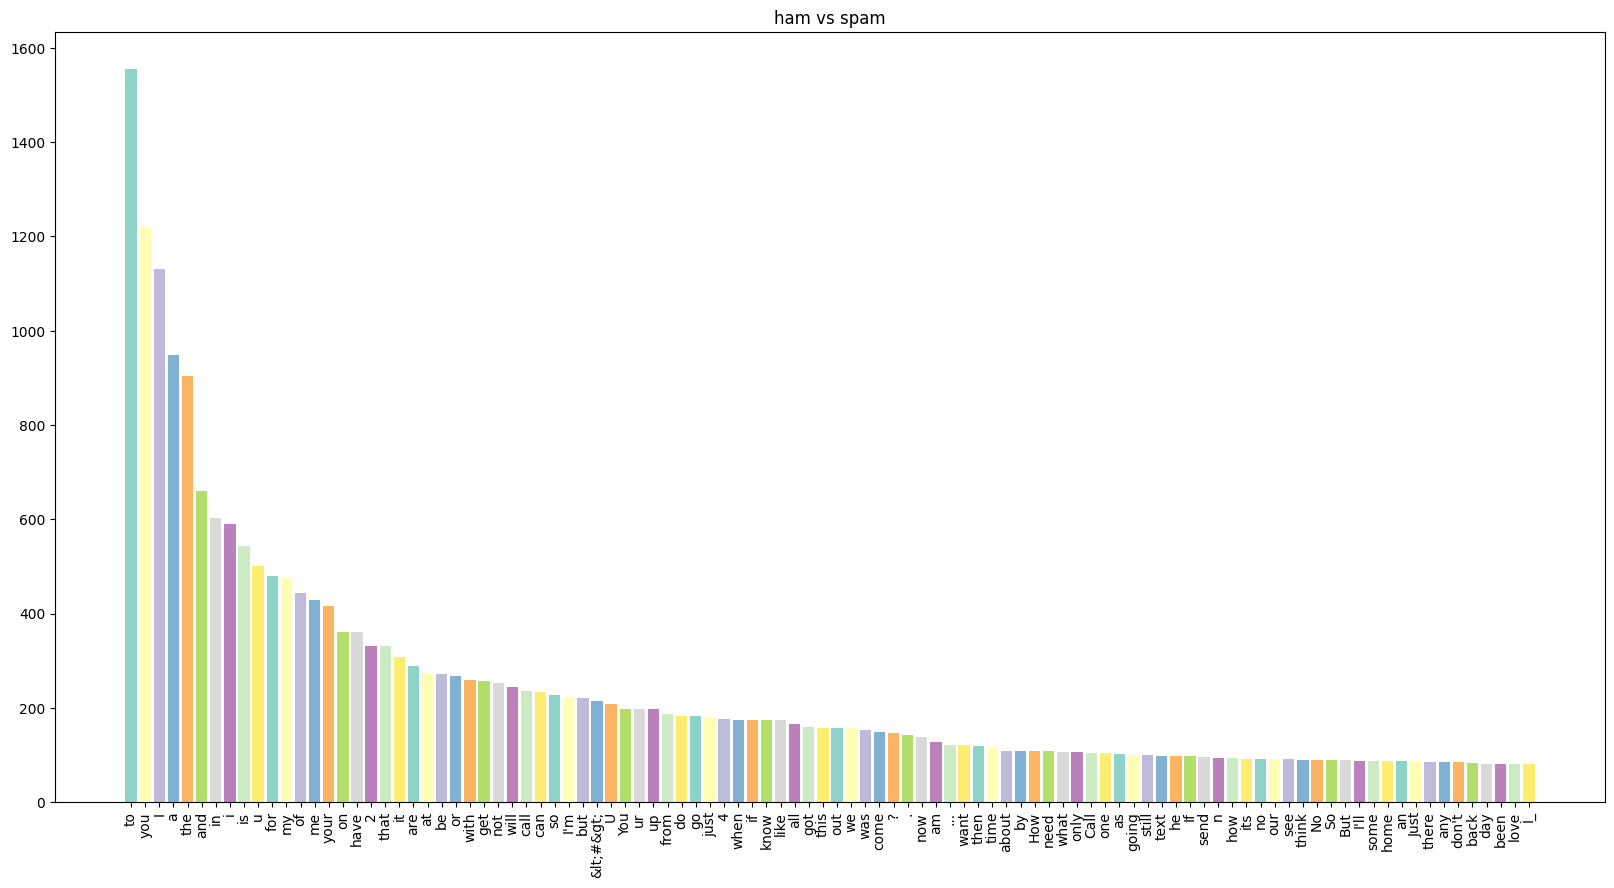

In [21]:
def convert_to_used_vocabulary(X):
    temp_dict = {}
    for text in X:
        for word in text.split():
             temp_dict[word] = temp_dict.get(word, 0) + 1
    return temp_dict

vocabulary = convert_to_used_vocabulary(X_train)
voc_sorted = dict(sorted(vocabulary.items(), key=lambda item: item[1], reverse=True))

#Pie plot

labels = []
sizes = []
for i in range(10):
    labels.append(list(voc_sorted.keys())[i])
    sizes.append(list(voc_sorted.values())[i])


cmap = plt.get_cmap('Set3')
colors = cmap(np.linspace(0, 1, 10))
fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(2,2,1)
explode = (0.3, 0.25, 0.2, 0.15,0.1, 0.09,0.08, 0.07,0.06, 0.05,)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
plt.title("10 most common words")

ax2 = fig1.add_subplot(2,2,2)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90, colors=colors)
plt.title("10 most common words")

labels = np.unique(y_train)
sizes = [y_train.value_counts()[0], y_train.value_counts()[1]]


ax3 = fig1.add_subplot(2,2,3)
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90, colors=colors)
plt.title("ham vs spam")
plt.subplots_adjust( wspace=0.1, hspace=0.1)

labels = []
empty_labels = []
sizes = []
for i in range(10):
    labels.append(list(voc_sorted.keys())[i])
    sizes.append(list(voc_sorted.values())[i])
ax4 = fig1.add_subplot(2,2,4)
ax4.bar(labels, sizes, color=colors)
plt.title("ham vs spam")
plt.xticks(rotation=90)

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(1,1,1)

for i in range(100):
    labels.append(list(voc_sorted.keys())[i])
    sizes.append(list(voc_sorted.values())[i])
ax1.bar(labels, sizes, color=colors)
plt.title("ham vs spam")
plt.xticks(rotation=90)
plt.subplots_adjust( wspace=0.1, hspace=0.1)


## Other Models

In [22]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train_vertorized,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [23]:
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgb.fit(X_train_vertorized,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [24]:
y_pred2 = rfc.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9777562862669246

confusion matrix: 
[[889   0]
 [ 23 122]]

precision score:  1.0


In [25]:
y_pred1 = xgb.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))

accuracy Score:  0.971953578336557

confusion matrix: 
[[887   2]
 [ 27 118]]

precision score:  0.9833333333333333


## Model Testing

After evaluating various classifier models, including LinearSVM, Random Forest Classifier, and XGBClassifier, for detecting spam SMS.

* Im going to proceed with testing using the Linear Support Vector Machine (LinearSVM) on our existing data.
* you can try with another data to test our models.

In [26]:
with open("mytext.txt","w") as fl:
    fl.write(X_test.iloc[2])

In [27]:
with open("mytext.txt","r") as fl:
    text = fl.read()

text

'Ok...'

In [28]:
vector_text = vectorizer.transform([text])

In [29]:
clf.predict(vector_text)

array([0])

In [30]:
y_test.iloc[2]

0

As evident from our evaluation, the performance of our detection model has been outstanding.

## Conclusion
I have used Classifier models - LinearSVM, Random Forest Classifier and XGBClassifier for detecting the spam SMS.
##* The LinearSVM has performed well with the accuracy of 98%